https://stepik.org/lesson/1370118/step/7

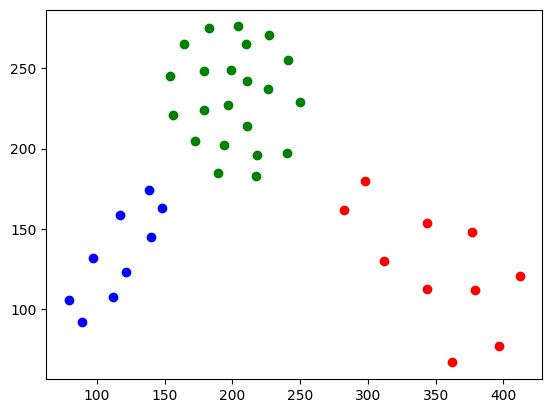

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X = [(189, 185), (172, 205), (156, 221), (154, 245), (164, 265), (183, 275), (204, 276), (227, 271), (241, 255), (250, 229), (240, 197), (217, 183), (194, 202), (179, 224), (179, 248), (199, 249), (197, 227), (211, 214), (211, 242), (210, 265), (226, 237), (218, 196), (79, 106), (97, 132), (117, 159), (138, 174), (148, 163), (140, 145), (121, 123), (112, 108), (89, 92), (282, 162), (298, 180), (344, 154), (344, 113), (362, 67), (397, 77), (412, 121), (379, 112), (377, 148), (312, 130)]
X = np.array(X)
K = 3

clustering = AgglomerativeClustering(n_clusters=K, linkage="ward", metric="euclidean")

res = clustering.fit_predict(X)

X1, X2, X3 = [X[res == i] for i in (0, 1, 2)]

# Визуализация
colors = ['r', 'g', 'b']
for i, xx in enumerate(X):
    plt.scatter(xx[0], xx[1], c=colors[res[i]])

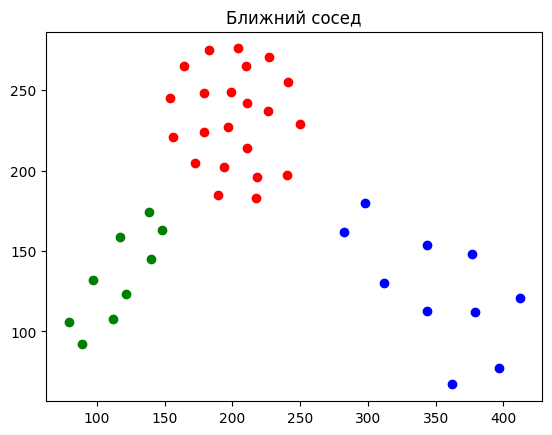

In [ ]:
# @title Самостоятельная реализация
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance
import matplotlib.pyplot as plt

X = [(189, 185), (172, 205), (156, 221), (154, 245), (164, 265), (183, 275), (204, 276), (227, 271), (241, 255), (250, 229), (240, 197), (217, 183), (194, 202), (179, 224), (179, 248), (199, 249), (197, 227), (211, 214), (211, 242), (210, 265), (226, 237), (218, 196), (79, 106), (97, 132), (117, 159), (138, 174), (148, 163), (140, 145), (121, 123), (112, 108), (89, 92), (282, 162), (298, 180), (344, 154), (344, 113), (362, 67), (397, 77), (412, 121), (379, 112), (377, 148), (312, 130)]
X = np.array(X)
K = 3

# Индекс минимального элемента
# idx_min = np.unravel_index(np.argmin(matrix), matrix.shape)

def hierarchical_clustering(X):
    # 1. Формирование множества C_1={{x_1},…,{x_l}}C_1={{x_1},…,{x_l}} одноэлементных кластеров
    clusters = np.array([[point] for point in X])
    # 2. Начало цикла и конец по достижению условия
    while len(clusters) > K:
        # 3. Ищем два кластера U, V с минимальным расстоянием R_UV​
        # Создаём матрицу расстояний и заполняем INF
        distances = np.full((len(clusters), len(clusters)), np.inf)
        '''distances[i, j] = min_dist'''
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                # критерий: минимальное расстояние между двумя кластерами (ближний сосед)
                '''flatten() возвращает копию массива, свёрнутого в одно измерение'''
                min_dist = min(distance.cdist(clusters[i], clusters[j]).flatten())
                distances[i, j] = min_dist
                # # критерий: дальний сосед
                # max_dist = max(distance.cdist(clusters[i], clusters[j]).flatten())
                # distances[i, j] = max_dist

        # Берём индекс найденнго минимального элемента
        '''np.unravel_index возвращает положение в двумерном массиве с формой distances.shape'''
        # idx_min_dist = np.unravel_index(np.argmin(distances + np.eye(len(distances)) * np.inf), distances.shape)
        idx_min_dist = np.unravel_index(np.argmin(distances), distances.shape)
        # 4. Объединияем в один кластер W два кластера U, V
        new_clusters = [clusters[i] for i in range(len(clusters)) if i not in idx_min_dist]
        split = list(clusters[idx_min_dist[0]]) + list(clusters[idx_min_dist[1]])
        new_clusters.append(split)
        clusters = new_clusters

    return clusters

result = hierarchical_clustering(X)
# for i in range(len(result)):
#     print('Класс', i+1)
#     print(result[i])

# Для проверки системой
clustering = AgglomerativeClustering(n_clusters=K, linkage="ward", metric="euclidean")
res = clustering.fit_predict(X)
X1, X2, X3 = [X[res == i] for i in (0, 1, 2)]

# Визуализация
colors = 'rgb'
for i in range(len(result)):
    for x in result[i]:
        plt.scatter(x[0], x[1], c=colors[i])
        plt.title('Ближний сосед')

### Шаги агломеративной иерархической кластеризации

1. **Инициализация**:
   - Начните с того, что каждая точка является отдельным кластером.
   - Вычислите матрицу расстояний между всеми парами точек.

2. **Выбор критерия объединения**:
   - **Минимальное расстояние (Single Linkage)**: Объединяются два ближайших объекта из разных кластеров.
   - **Максимальное расстояние (Complete Linkage)**: Объединяются два ближайших объекта из разных кластеров так, чтобы максимальное расстояние внутри нового кластера было минимальным.
   - **Среднее связующее (Average Linkage)**: Среднее значение всех парных расстояний внутри двух объединяемых групп используется для определения близости.

3. **Цикл объединения**:
   - На каждом шаге находите две ближайшие группы по выбранному критерию.
   - Объедините эти группы в одну новую группу.
   - Обновите матрицу расстояний для новых групп.

4. **Остановка алгоритма**:
   - Остановитесь когда останется только один общий кластер или достигнете желаемого количества кластеров.

### Структура данных для эффективной реализации

- Используйте двумерный массив или словарь для хранения текущих групп (кластеров).
- Матрица или словарь для хранения текущих расстояний между группами.
